# 5. Script for exploratory data analysis

## Set Up

In [13]:
import pandas as pd

In [14]:
pd.set_option('display.max_colwidth', None)

In [15]:
path = "C:\\Users\\nicol\\Documents\\2021-2022\\QMSS\\Spring'22\\QMSS 5999 Thesis\\data\\"

# Import score data
reddit = pd.read_csv(path+'comments_reddit_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
fb = pd.read_csv(path+'comments_fb_all_score.csv', index_col=0, dtype={'comment_id': 'str', 'text': 'str'}, keep_default_na=False)
reddit = reddit[['comment_id', 'score_vader', 'score_tb']]
fb = fb[['comment_id', 'score_vader', 'score_tb']]

In [16]:
display(reddit.head())
display(fb.head())

,comment_id,score_vader,score_tb
0,gww5drd,-0.2960,0.0000
1,gww5jfz,-0.2462,0.2083
2,gww68ne,-0.4404,-0.4000
3,gww6icr,-0.9668,-0.2444
4,gww6luf,0.0772,-0.1000


,comment_id,score_vader,score_tb
0,10157877630867115,0.0000,0.0000
1,10157877561317115,-0.7044,0.0479
2,10157877564117115,0.3382,0.4688
3,10157877557412115,-0.8805,-0.1250
4,10157877555032115,-0.8319,0.2500


## Summary statistics

To better understand the distribution of the Reddit and Facebook polarity scores, I will first obtain some summary statistics
like counts, min/max values, mean, standard deviation, etc. 

In [17]:
# Obtaining Reddit summary statistics
reddit.describe()

,score_vader,score_tb
count,9112.000000,9112.000000
mean,0.034487,0.047475
std,0.471123,0.246515
min,-0.995900,-1.000000
25%,-0.296000,-0.011450
50%,0.000000,0.000000
75%,0.402850,0.150000
max,0.998800,1.000000


In [18]:
# Obtaining Facebook summary statistics
fb.describe()

,score_vader,score_tb
count,6607.000000,6607.000000
mean,0.046572,0.058876
std,0.444347,0.247841
min,-0.996800,-1.000000
25%,-0.202300,0.000000
50%,0.000000,0.000000
75%,0.381800,0.136400
max,0.997100,1.000000


We know that FB and Reddit scores are on the same scales of -1.0 to 1.0, and the summary statistics match that.
Across both VADER and TextBlob scores:
- Sample means are different, but not too far apart (still both positive), just that Reddit sample means are slightly less positive
- Reddit interquartile range larger than facebook
- Can visualize this better with boxplot
- Both medians are at zero 

## Visualizations

### Boxplots

In [19]:
# Concatenating dataframes into one dataframe with an additional column indicating platform
reddit['platform'] = 'Reddit'
fb['platform'] = 'Facebook'

all_score = pd.concat([reddit, fb], ignore_index=True)
display(all_score.head())
display(all_score.tail())

,comment_id,score_vader,score_tb,platform
0,gww5drd,-0.2960,0.0000,Reddit
1,gww5jfz,-0.2462,0.2083,Reddit
2,gww68ne,-0.4404,-0.4000,Reddit
3,gww6icr,-0.9668,-0.2444,Reddit
4,gww6luf,0.0772,-0.1000,Reddit


,comment_id,score_vader,score_tb,platform
15714,10158186215552115,-0.5095,-0.1896,Facebook
15715,10158186213932115,-0.8357,-0.0875,Facebook
15716,10158186213787115,0.0000,0.0000,Facebook
15717,10158186211122115,-0.5962,0.1250,Facebook
15718,10158186210967115,0.0516,0.0000,Facebook


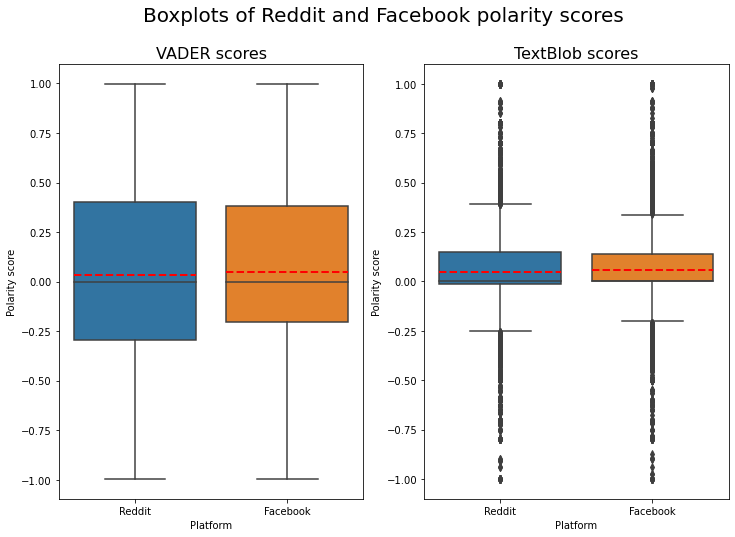

In [35]:
# Generating boxplots
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize = (12, 8))
fig.suptitle('Boxplots of Reddit and Facebook polarity scores', fontsize=20)

sns.boxplot(x='platform', y='score_vader', data=all_score, 
            showmeans=True, meanline=True, meanprops={'color': 'red', 'ls': '--', 'lw': 2},
            ax=axes[0]).set(xlabel='Platform', ylabel='Polarity score')
axes[0].set_title('VADER scores',fontsize=16)

sns.boxplot(x='platform', y='score_tb', data=all_score, 
            showmeans=True, meanline=True, meanprops={'color': 'red', 'ls': '--', 'lw': 2},
            ax=axes[1]).set(xlabel='Platform', ylabel='Polarity score')
axes[1].set_title('TextBlob scores',fontsize=16)

plt.savefig('../plots/boxplots.png', bbox_inches='tight')
plt.show()

### Histograms

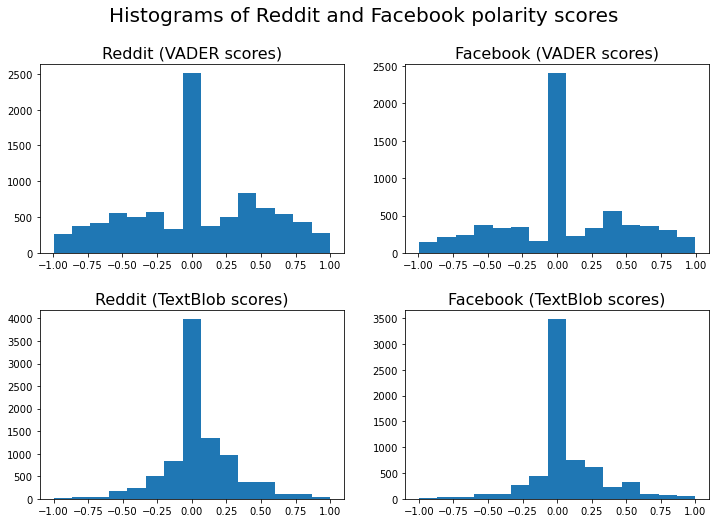

In [33]:
# Generating histograms
from matplotlib import pyplot as plt

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0.3)
fig.suptitle('Histograms of Reddit and Facebook polarity scores', fontsize=20)


row = 0 
col = 0 
hist_list = [reddit['score_vader'], reddit['score_tb'], fb['score_vader'], fb['score_tb']]
labels_list = ['Reddit (VADER scores)', 'Reddit (TextBlob scores)', 'Facebook (VADER scores)', 'Facebook (TextBlob scores)']

for i in range(0,4):
    hist = hist_list[i]
    ax[row][col].hist(hist, bins=15)
    ax[row][col].set_title(labels_list[i], fontsize=16)
    row = row+1
    if row == rows:
        row = 0
        col = col+1
        
plt.savefig('../plots/histograms.png', bbox_inches='tight')
plt.show()

From the above we can see that all samples resemble normal distributions, with VADER scores having a wider distribution and TextBlob scores having a tighter distribution. The median and mode is also at 0 - distribution is seemingly zero-inflated. Since there is no skew and median is at zero, median is not a meaningful measure of central tendency of the samples. We will just use the mean instead when validating our hypothesis and drawing conclusions from the data.